In [1]:
import pandas as pd
import plotly.io as pio

data = pd.read_csv("data.csv")
data["time"] = pd.to_datetime(data["ts"], format='mixed').dt.time

In [2]:
timestamps = pd.Series(["2024-08-21 09:26:38", "2024-08-21 09:27:48", "2024-08-21 09:41:00", '2024-08-21 09:42:10', '2024-08-21 09:55:25', \
                '2024-08-21 09:56:55', '2024-08-21 10:06:17', '2024-08-21 10:07:47', '2024-08-21 10:25:00','2024-08-21 10:26:20',\
                '2024-08-21 10:35:25', '2024-08-21 10:36:45', '2024-08-21 10:40:13', '2024-08-21 10:41:33', '2024-08-21 10:45:52',\
                '2024-08-21 10:47:22', '2024-08-21 10:49:37', '2024-08-21 10:51:07', '2024-08-21 12:17:03','2024-08-21 12:27:53',\
                '2024-08-21 12:44:41', '2024-08-21 12:49:51', '2024-08-21 12:56:45', '2024-08-21 13:04:15'])

timestamps = pd.DataFrame(timestamps, columns=["timestamps"])
timestamps['time'] = pd.to_datetime(timestamps["timestamps"], format='mixed').dt.time

In [56]:
timelabels = ['проезд на нормально откалиброванной машине', \
              'виляния с низкой частотой и средней амплитудой на прямой', \
              'выская частота виляний, малая амплитуда, активно крутит колесами на месте', \
              'виляния с самой низкой частотой и средней амплитудой на прямой', \
              'выская частота виляний, малая амплитуда, активно крутит колесами на месте', \
              'виляние с довольно высокой частотой и средней амплитудой, весьма некомфортно', \
              'неяркие виляния с малой частотой и амплитудой', \
              'неуверенный выход на траекторию с виляниями, по прямой виляния с малой частотой и амплитудой', \
              'радикальный выход на тракторию с поворотами колёс почти в упор, по прямой виляния со ср. част. и ср. ампл.', \
              'проезды по техколее в разные стороны по разным камерам с хорошей точностью с нормальными калибами', \
              'ехал в целом терпимо, константное смещение', \
              'по левой константное смещение с виляниями, по правой совершенно неадекватная езда']

In [57]:
import plotly.express as px

fig = data.plot(x="time", y="cte")

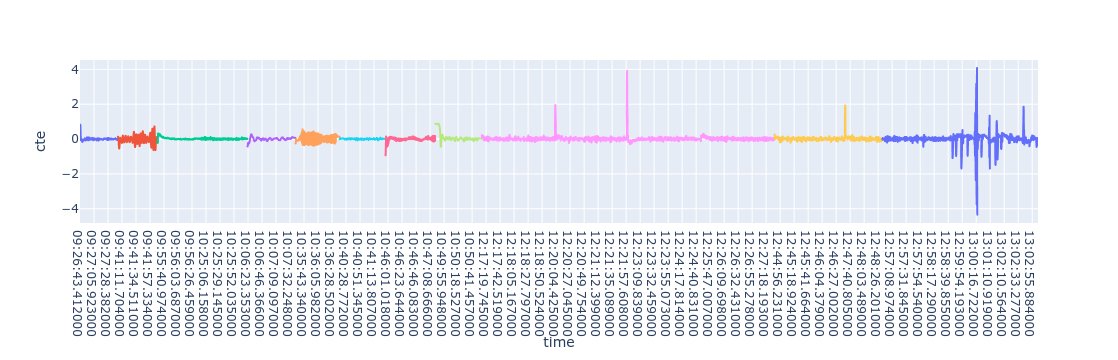

In [58]:
pd.options.plotting.backend = "plotly"
plot_data = pd.DataFrame()

for i in range(0, timestamps.shape[0], 2):
    start = timestamps.at[i, "time"]
    end = timestamps.at[i + 1, "time"]
    piece_of_data = data[(end >= data["time"]) & (data['time'] >= start)]
    piece_of_data.insert(piece_of_data.shape[1], 'time section', [timelabels[i // 2]] * piece_of_data.shape[0])
    plot_data = pd.concat([plot_data, piece_of_data])

fig = px.line(plot_data, x="time", y="cte", color="time section")
#fig.update_layout(legend=dict(yanchor="top", y=20, xanchor="left", x=0)) 
fig.update_layout(showlegend=False)
fig.show()

In [59]:
fig.write_image("images/cte(t) plot.png")

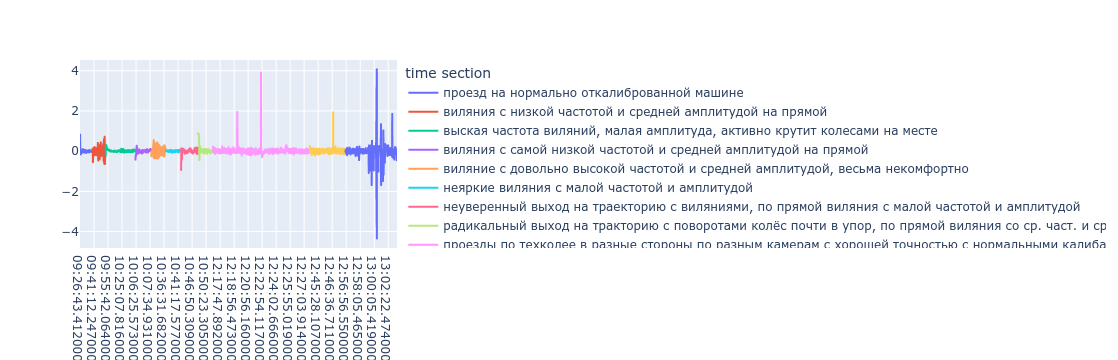

In [62]:
fig.update_layout(showlegend=True)
fig.show()